In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls

gdrive	sample_data


In [0]:
import os
import sys
source_root_path = 'gdrive/My Drive/Colab/GenerativeDeepLearning/source'
sys.path.append(source_root_path)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from utils.loaders import load_celeb
from utils.get_drive_file import download_file_from_google_drive
from models.WGANGP import WGANGP

Using TensorFlow backend.


In [0]:
logs_root_path = 'gdrive/My Drive/Colab/GenerativeDeepLearning/logs'
data_dir = 'gdrive/My Drive/Colab/GenerativeDeepLearning/data'

In [0]:
celeb_faces_data_id = '0B7EVK8r0v71pZjFTYXZWM3FlRnM'
save_zip_path = os.path.join(data_dir, 'celebA.zip')
if not os.path.exists(save_zip_path):
  download_file_from_google_drive(celeb_faces_data_id, save_zip_path)
  import zipfile
  with zipfile.ZipFile(save_zip_path) as existing_zip:
    existing_zip.extractall(data_dir)
    
  import shutil
  from tqdm import tqdm

  data_path = os.path.join(data_dir, 'img_align_celeba')
  for p in tqdm(os.listdir(data_path)):
    if os.path.splitext(p)[-1] == '.jpg':
      shutil.move(os.path.join(data_path, p), os.path.join(data_path, 'face'))

In [0]:
# run params
SECTION = 'wgangp'
RUN_ID = '0001'
DATA_NAME = 'img_align_celeba'
RUN_FOLDER = os.path.join(logs_root_path, SECTION)
# RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [0]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [10]:
x_train = load_celeb(data_dir, DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 43859 images belonging to 1 classes.


In [11]:
x_train[0][0][0]

array([[[-0.90588236, -0.90588236, -0.90588236],
        [-0.90588236, -0.90588236, -0.90588236],
        [-0.90588236, -0.90588236, -0.90588236],
        ...,
        [-0.90588236, -0.9137255 , -0.92941177],
        [-0.8901961 , -0.8980392 , -0.9137255 ],
        [-0.85882354, -0.8745098 , -0.8666667 ]],

       [[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.90588236, -0.9137255 , -0.92941177],
        [-0.8901961 , -0.8980392 , -0.9137255 ],
        [-0.8745098 , -0.8901961 , -0.88235295]],

       [[-0.92941177, -0.92941177, -0.92941177],
        [-0.92941177, -0.92941177, -0.92941177],
        [-0.92941177, -0.92941177, -0.92941177],
        ...,
        [-0.9137255 , -0.92156863, -0.9372549 ],
        [-0.88235295, -0.8901961 , -0.90588236],
        [-0.88235295, -0.8980392 , -0.8901961 ]],

       ...,

       [[-0.8509804 , -0.88235295, -0.8901961 ],
        [-0

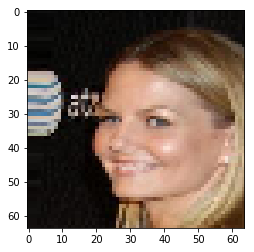

In [12]:
plt.imshow((x_train[0][0][0]+1)/2)

In [13]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimizer = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0815 09:50:56.483198 140107321489280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 09:50:56.502635 140107321489280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0815 09:50:56.619992 140107321489280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 09:50:56.750917 140107321489280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0815 09:50:56.813432 14

In [14]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [15]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

In [0]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 1000
N_CRITIC = 5
# BATCH_SIZE = 6

In [17]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0815 09:50:59.897759 140107321489280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (-0.4)(R -5.5, F -0.6, G 0.6)] [G loss: 1.3]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-75.3)(R -119.4, F -3.8, G 4.8)] [G loss: 3.4]
2 (5, 1) [D loss: (-123.4)(R -190.1, F 10.0, G 5.7)] [G loss: -12.8]
3 (5, 1) [D loss: (-124.1)(R -198.7, F 12.2, G 6.2)] [G loss: -11.6]
4 (5, 1) [D loss: (-138.4)(R -252.3, F 22.5, G 9.1)] [G loss: -13.3]
5 (5, 1) [D loss: (-123.8)(R -219.7, F 13.5, G 8.2)] [G loss: -7.3]
6 (5, 1) [D loss: (-121.1)(R -182.9, F -3.3, G 6.5)] [G loss: -4.9]
7 (5, 1) [D loss: (-140.4)(R -243.4, F 25.6, G 7.7)] [G loss: -16.0]
8 (5, 1) [D loss: (-115.3)(R -172.9, F -0.1, G 5.8)] [G loss: -28.6]
9 (5, 1) [D loss: (-122.6)(R -211.9, F 19.7, G 7.0)] [G loss: -15.8]
10 (5, 1) [D loss: (-122.1)(R -204.6, F 16.8, G 6.6)] [G loss: -13.1]
11 (5, 1) [D loss: (-115.4)(R -209.0, F 16.5, G 7.7)] [G loss: -20.4]
12 (5, 1) [D loss: (-106.4)(R -186.5, F 14.5, G 6.6)] [G loss: -18.3]
13 (5, 1) [D loss: (-112.8)(R -216.9, F 25.8, G 7.8)] [G loss: -0.2]
14 (5, 1) [D loss: (-122.8)(R -209.6, F 21.0, G 6.6)] [G loss: -35.5]
15 (5, 1) [D loss: (-114.0)(R -199.

OSError: ignored

In [0]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()